# Suavizado de datos

## Muestra D189 a 15616 Hz

### Fourier

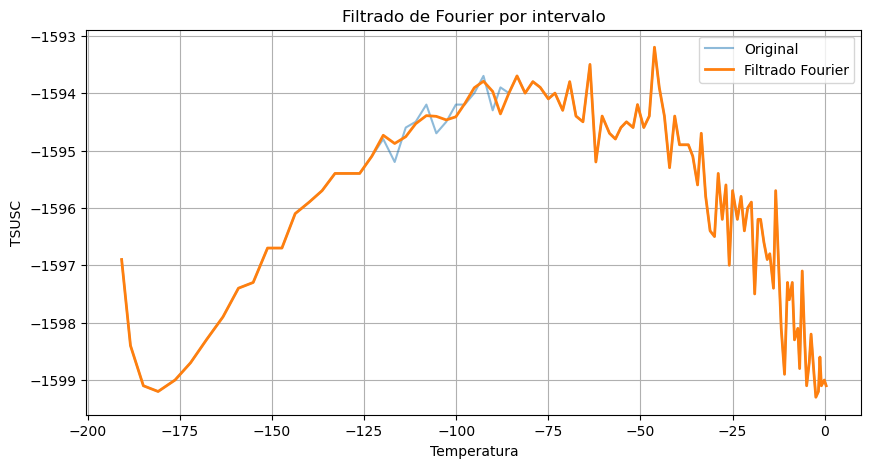

In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D189/D189_15616.xlsx')  
x = df['Temperatura'].values
y = df['TSUSC'].values 

# Índices del intervalo donde se aplica la transformada de Fourier
i_ini = 19   
i_fin = 31  

# Segmento a suavizar
y_segment = y[i_ini:i_fin+1]

# Transformada de Fourier
y_fft = np.fft.fft(y_segment)
frequencies = np.fft.fftfreq(len(y_segment))

# Filtro pasa-bajas
cutoff = 0.2
y_fft_filtered = y_fft.copy()
y_fft_filtered[np.abs(frequencies) > cutoff] = 0

# Reconstrucción de la señal suavizada
y_smoothed_segment = np.fft.ifft(y_fft_filtered).real

# Sustituición
y_smoothed = y.copy()
y_smoothed[i_ini:i_fin+1] = y_smoothed_segment

# Nuevo formato de datos
df_filtrado = pd.DataFrame({
    'Temperatura': x,
    'TSUSC': y_smoothed
})

output_path = 'C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D189/fourier_D189_15616.xlsx'  
df_filtrado.to_excel(output_path, index=False)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Original', alpha=0.5)
plt.plot(x, y_smoothed, label='Filtrado Fourier', linewidth=2)
plt.xlabel('Temperatura')
plt.ylabel('TSUSC')
plt.title('Filtrado de Fourier por intervalo')
plt.legend()
plt.grid(True)
plt.show()

### Ventana movil

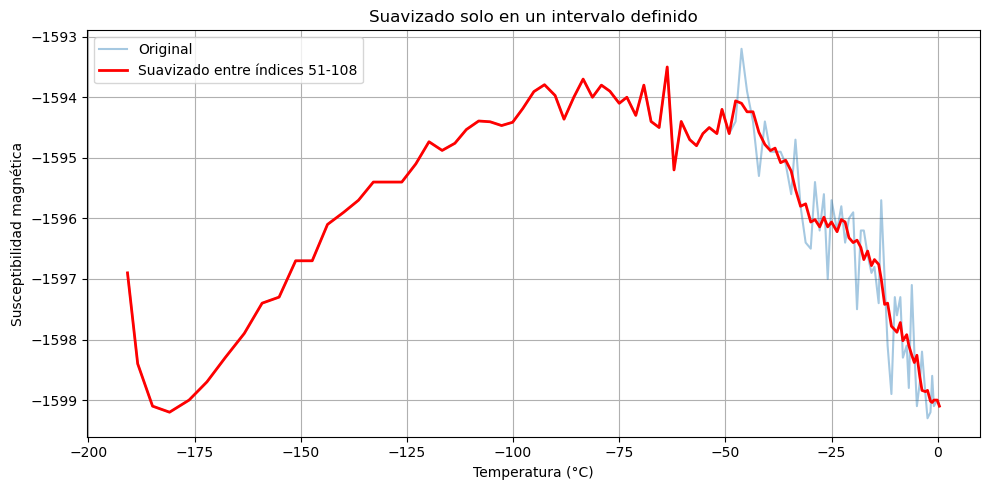

In [253]:
archivo = 'C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D189/fourier_D189_15616.xlsx'  
ventana = 5
inicio = 51
fin = 108

df = pd.read_excel(archivo)
df.columns = ['Temperatura', 'TSUSC']
df['Suavizado Parcial'] = df['TSUSC']

# Suavizado 
suavizado = df.loc[inicio:fin, 'TSUSC'].rolling(window=ventana, center=True).mean()
suavizado_final = suavizado.copy()
suavizado_final.fillna(df.loc[inicio:fin, 'TSUSC'], inplace=True)

df.loc[inicio:fin, 'Suavizado Parcial'] = suavizado_final

plt.figure(figsize=(10, 5))
plt.plot(df['Temperatura'], df['TSUSC'], label='Original', alpha=0.4)
plt.plot(df['Temperatura'], df['Suavizado Parcial'], label=f'Suavizado entre índices {inicio}-{fin}', color='red', linewidth=2)
plt.xlabel('Temperatura (°C)')
plt.ylabel('Susceptibilidad magnética')
plt.title('Suavizado solo en un intervalo definido')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

df.to_excel('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D189/suavizado_D189_15616.xlsx', index=False)

### Splines

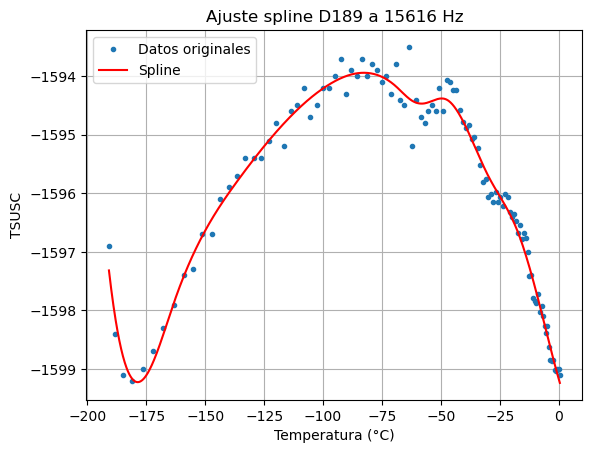

In [447]:
from scipy.interpolate import UnivariateSpline

df = pd.read_excel('C:/Users/jesus/OneDrive/Documentos/suavizado_D189_15616.xlsx')
df = df.sort_values(by='Temperatura')
x = df['Temperatura']
y = df['Suavizado Parcial']

# Crear el spline
spline = UnivariateSpline(x, y, s=5)
x_new = np.linspace(x.min(), x.max(), 1000)
y_new = spline(x_new)

plt.plot(x, y, 'o', label='Datos originales', markersize=3)
plt.plot(x_new, y_new, 'r-', label='Spline')
plt.xlabel('Temperatura (°C)')
plt.ylabel('TSUSC')
plt.title('Ajuste spline D189 a 15616 Hz')
plt.legend()
plt.grid(True)
plt.savefig('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D189/Spline2D_D189_15616.png', dpi=300)
plt.show()

df_spline = pd.DataFrame({
    'Temperatura': x_new,
    'Spline': y_new
})

df_spline.to_excel('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D189/spline_final_D189_15616.xlsx', index=False)

## Muestra D189 a 3904 Hz
### Fourier

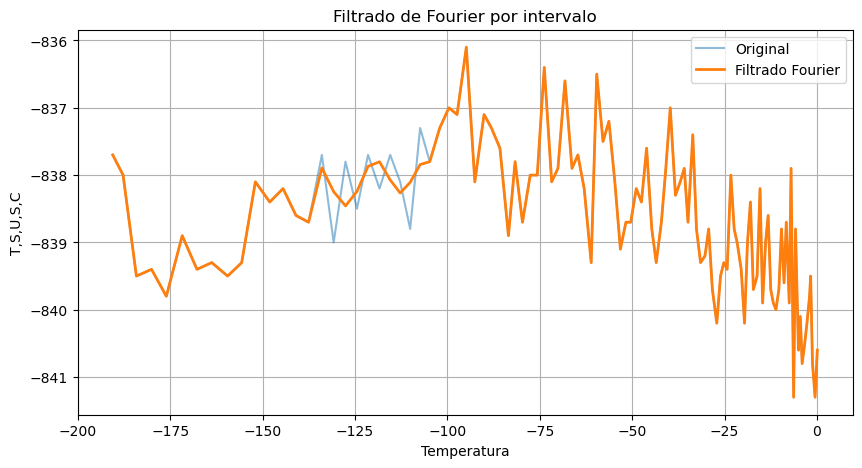

In [265]:
df = pd.read_excel('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D189/D189_3904(1).xlsx')  


x = df['Temperatura'].values
y = df['TSUSC'].values  

i_ini = 15   
i_fin = 24  

# Segmento a suavizar
y_segment = y[i_ini:i_fin+1]

y_fft = np.fft.fft(y_segment)
frequencies = np.fft.fftfreq(len(y_segment))

cutoff = 0.2
y_fft_filtered = y_fft.copy()
y_fft_filtered[np.abs(frequencies) > cutoff] = 0

y_smoothed_segment = np.fft.ifft(y_fft_filtered).real
y_smoothed = y.copy()
y_smoothed[i_ini:i_fin+1] = y_smoothed_segment


df_filtrado = pd.DataFrame({
    'Temperatura': x,
    'TSUSC': y_smoothed
})

output_path = 'C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D189/fourier_D189_3904.xlsx'  
df_filtrado.to_excel(output_path, index=False)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Original', alpha=0.5)
plt.plot(x, y_smoothed, label='Filtrado Fourier', linewidth=2)
plt.xlabel('Temperatura')
plt.ylabel('T,S,U,S,C')
plt.title('Filtrado de Fourier por intervalo')
plt.legend()
plt.grid(True)
plt.show()

### Ventana movil

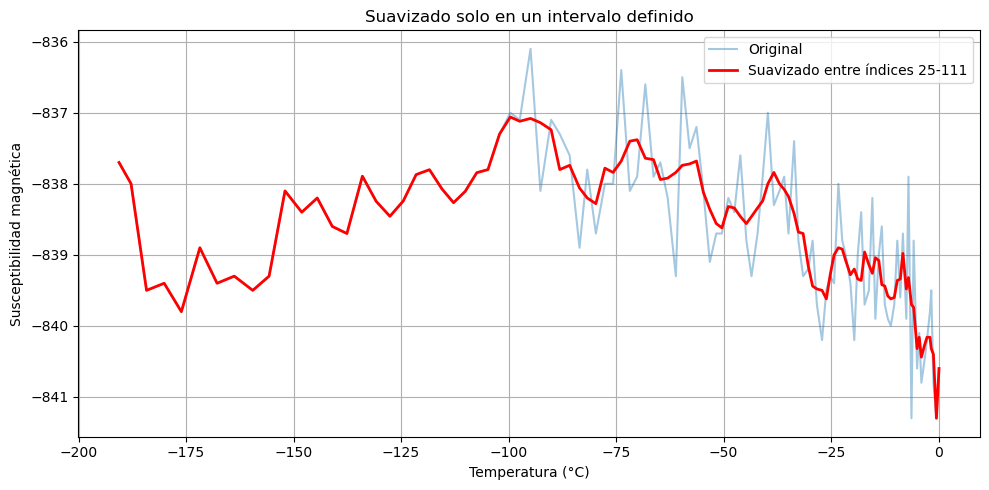

In [270]:
archivo = 'C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D189/fourier_D189_3904.xlsx'  
ventana = 5
inicio = 25
fin = 111

df = pd.read_excel(archivo)
df.columns = ['Temperatura', 'TSUSC']
df['Suavizado Parcial'] = df['TSUSC']
suavizado = df.loc[inicio:fin, 'TSUSC'].rolling(window=ventana, center=True).mean()


suavizado_final = suavizado.copy()
suavizado_final.fillna(df.loc[inicio:fin, 'TSUSC'], inplace=True)

df.loc[inicio:fin, 'Suavizado Parcial'] = suavizado_final

plt.figure(figsize=(10, 5))
plt.plot(df['Temperatura'], df['TSUSC'], label='Original', alpha=0.4)
plt.plot(df['Temperatura'], df['Suavizado Parcial'], label=f'Suavizado entre índices {inicio}-{fin}', color='red', linewidth=2)
plt.xlabel('Temperatura (°C)')
plt.ylabel('Susceptibilidad magnética')
plt.title('Suavizado solo en un intervalo definido')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

df.to_excel('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D189/suavizado_D189_3904.xlsx', index=False)

### Splines

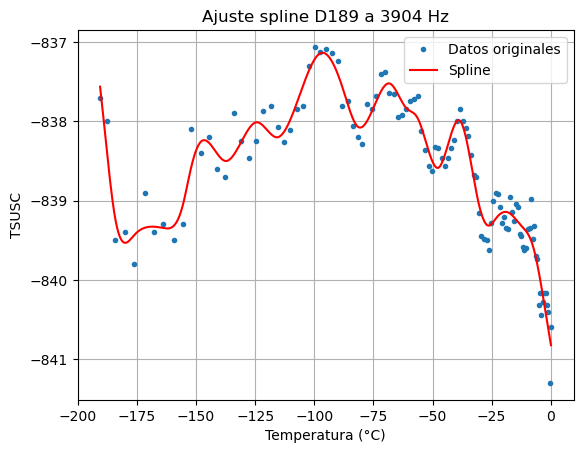

In [445]:
from scipy.interpolate import UnivariateSpline

df = pd.read_excel('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D189/suavizado_D189_3904.xlsx')
df = df.sort_values(by='Temperatura')

x = df['Temperatura']
y = df['Suavizado Parcial']

spline = UnivariateSpline(x, y, s=5)
x_new = np.linspace(x.min(), x.max(), 1000)
y_new = spline(x_new)

plt.plot(x, y, 'o', label='Datos originales', markersize=3)
plt.plot(x_new, y_new, 'r-', label='Spline')
plt.xlabel('Temperatura (°C)')
plt.ylabel('TSUSC')
plt.title('Ajuste spline D189 a 3904 Hz')
plt.legend()
plt.grid(True)
plt.savefig('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D189/Spline2D_D189_3904.png', dpi=300)
plt.show()
df_spline = pd.DataFrame({
    'Temperatura': x_new,
    'Spline': y_new
})

df_spline.to_excel('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D189/spline_final_D189_3904.xlsx', index=False)

## Muestra D189 a 976 Hz

### Fourier

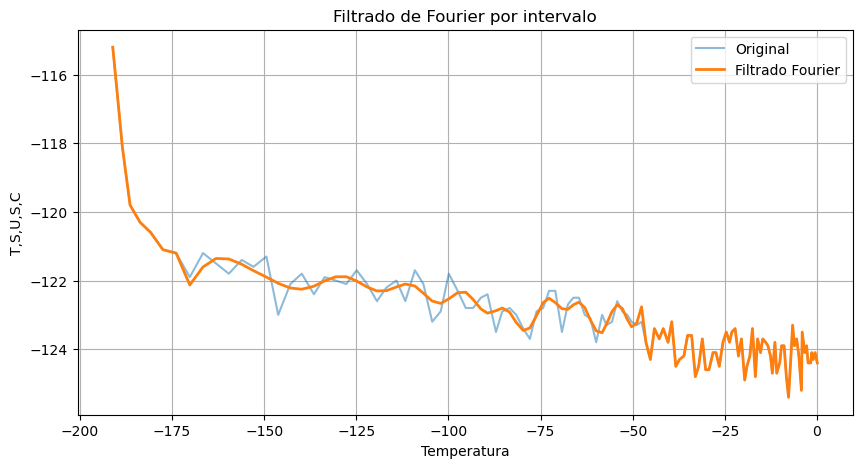

In [313]:
df = pd.read_excel('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D189/D189_976.xlsx')  
x = df['Temperatura'].values
y = df['TSUSC'].values  

i_ini = 8   
i_fin = 63  

y_segment = y[i_ini:i_fin+1]
y_fft = np.fft.fft(y_segment)
frequencies = np.fft.fftfreq(len(y_segment))

cutoff = 0.2
y_fft_filtered = y_fft.copy()
y_fft_filtered[np.abs(frequencies) > cutoff] = 0

y_smoothed_segment = np.fft.ifft(y_fft_filtered).real
y_smoothed = y.copy()
y_smoothed[i_ini:i_fin+1] = y_smoothed_segment

df_filtrado = pd.DataFrame({
    'Temperatura': x,
    'TSUSC': y_smoothed
})

output_path = 'C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D189/fourier_D189_976.xlsx' 
df_filtrado.to_excel(output_path, index=False)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Original', alpha=0.5)
plt.plot(x, y_smoothed, label='Filtrado Fourier', linewidth=2)
plt.xlabel('Temperatura')
plt.ylabel('T,S,U,S,C')
plt.title('Filtrado de Fourier por intervalo')
plt.legend()
plt.grid(True)
plt.show()

### Ventana movil

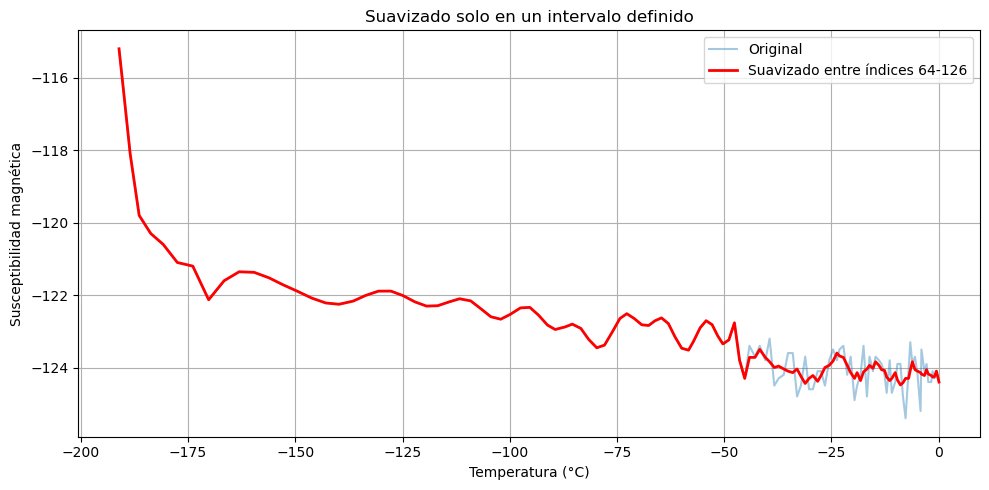

In [291]:
archivo = 'C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D189/fourier_D189_976.xlsx'  
ventana = 5
inicio = 64
fin = 126

df = pd.read_excel(archivo)
df.columns = ['Temperatura', 'TSUSC']
df['Suavizado Parcial'] = df['TSUSC']

suavizado = df.loc[inicio:fin, 'TSUSC'].rolling(window=ventana, center=True).mean()
suavizado_final = suavizado.copy()
suavizado_final.fillna(df.loc[inicio:fin, 'TSUSC'], inplace=True)

df.loc[inicio:fin, 'Suavizado Parcial'] = suavizado_final

plt.figure(figsize=(10, 5))
plt.plot(df['Temperatura'], df['TSUSC'], label='Original', alpha=0.4)
plt.plot(df['Temperatura'], df['Suavizado Parcial'], label=f'Suavizado entre índices {inicio}-{fin}', color='red', linewidth=2)
plt.xlabel('Temperatura (°C)')
plt.ylabel('Susceptibilidad magnética')
plt.title('Suavizado solo en un intervalo definido')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

df.to_excel('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D189/suavizado_D189_976.xlsx', index=False)

### Splines

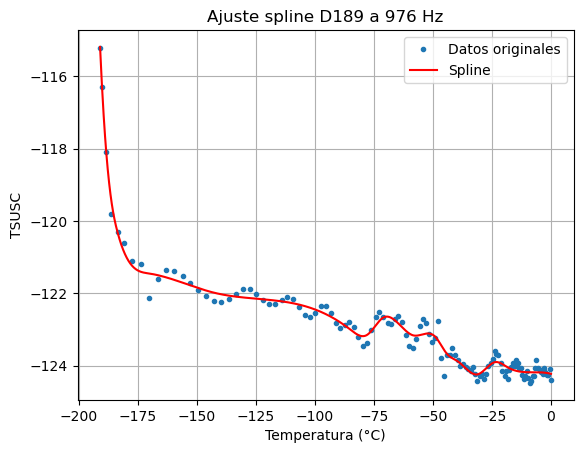

In [443]:
from scipy.interpolate import UnivariateSpline

df = pd.read_excel('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D189/suavizado_D189_976.xlsx')
df = df.sort_values(by='Temperatura')

x = df['Temperatura']
y = df['Suavizado Parcial']
spline = UnivariateSpline(x, y, s=5)

x_new = np.linspace(x.min(), x.max(), 1000)
y_new = spline(x_new)

plt.plot(x, y, 'o', label='Datos originales', markersize=3)
plt.plot(x_new, y_new, 'r-', label='Spline')
plt.xlabel('Temperatura (°C)')
plt.ylabel('TSUSC')
plt.title('Ajuste spline D189 a 976 Hz')
plt.legend()
plt.grid(True)
plt.savefig('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D189/Spline2D_D189_976.png', dpi=300)
plt.show()

df_spline = pd.DataFrame({
    'Temperatura': x_new,
    'Spline': y_new
})

df_spline.to_excel('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D189/spline_final_D189_976.xlsx', index=False)

## Generación de curvas en 3D

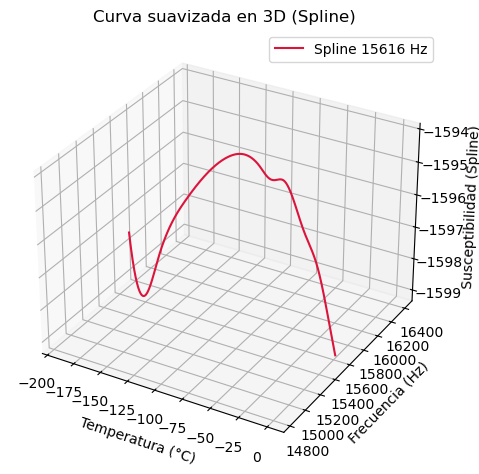

In [415]:
from mpl_toolkits.mplot3d import Axes3D

archivo = "C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D189/spline_final_D189_15616.xlsx"  
df = pd.read_excel(archivo)

x = df["Temperatura"].to_numpy()
z = df["Spline"].to_numpy()
f = 15616  # frecuencia fija
y = np.full_like(x, f)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label="Spline 15616 Hz", color='crimson')

ax.set_xlabel("Temperatura (°C)")
ax.set_ylabel("Frecuencia (Hz)")
ax.set_zlabel("Susceptibilidad (Spline)")
ax.set_title("Curva suavizada en 3D (Spline)")
plt.legend()
plt.tight_layout()
plt.savefig('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D189/Spline3D_D189_15616.png', dpi=300)
plt.show()

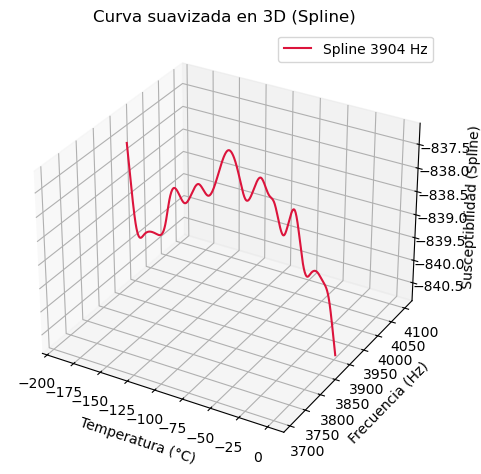

In [423]:
archivo = "C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D189/spline_final_D189_3904.xlsx"  
df = pd.read_excel(archivo)

x = df["Temperatura"].to_numpy()
z = df["Spline"].to_numpy()
f = 3904  # frecuencia fija
y = np.full_like(x, f)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label="Spline 3904 Hz", color='crimson')

ax.set_xlabel("Temperatura (°C)")
ax.set_ylabel("Frecuencia (Hz)")
ax.set_zlabel("Susceptibilidad (Spline)")
ax.set_title("Curva suavizada en 3D (Spline)")
plt.legend()
plt.tight_layout()
plt.savefig('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D189/Spline3D_D189_3904.png', dpi=300)
plt.show()

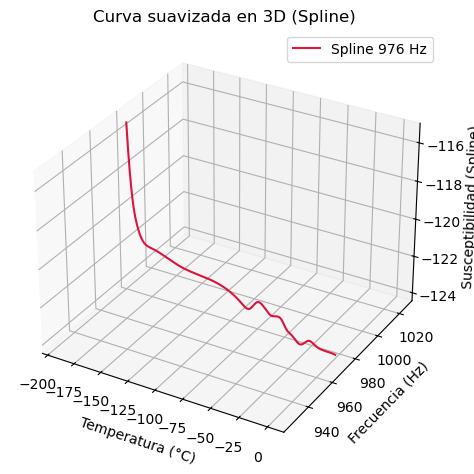

In [425]:
archivo = "C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D189/spline_final_D189_976.xlsx" 
df = pd.read_excel(archivo)

x = df["Temperatura"].to_numpy()
z = df["Spline"].to_numpy()
f = 976  # frecuencia fija
y = np.full_like(x, f)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label="Spline 976 Hz", color='crimson')

ax.set_xlabel("Temperatura (°C)")
ax.set_ylabel("Frecuencia (Hz)")
ax.set_zlabel("Susceptibilidad (Spline)")
ax.set_title("Curva suavizada en 3D (Spline)")
plt.legend()
plt.tight_layout()
plt.savefig('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D189/Spline3D_D189_976.png', dpi=300)
plt.show()

## Superficie muestra D139

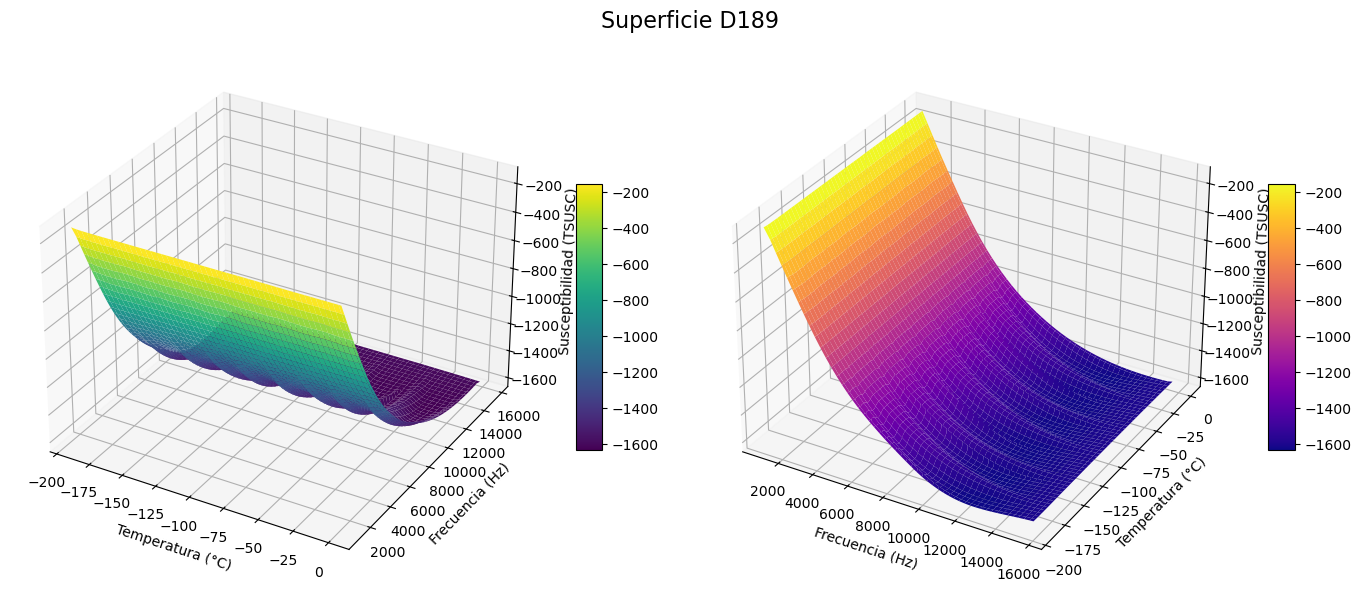

In [181]:
from scipy.interpolate import griddata

archivos = {
    976: 'C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D189/spline_final_D189_976.xlsx',
    3904: 'C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D189/spline_final_D189_3904.xlsx',
    15616: 'C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D189/spline_final_D189_15616.xlsx'
}

datos = []
for f, archivo in archivos.items():
    df = pd.read_excel(archivo)
    df['frecuencia'] = f  
    datos.append(df)

df_total = pd.concat(datos)

temperatura = df_total['Temperatura']
frecuencia = df_total['frecuencia']
splines = df_total['Spline']

ti = np.linspace(temperatura.min(), temperatura.max(), 200)
fi = np.linspace(frecuencia.min(), frecuencia.max(), 200)

# Vista 1: X=temperatura, Y=frecuencia
X1, Y1 = np.meshgrid(ti, fi)
Z1 = griddata((temperatura, frecuencia), splines, (X1, Y1), method='cubic')

# Vista 2: X=frecuencia, Y=temperatura
X2, Y2 = np.meshgrid(fi, ti)
Z2 = griddata((frecuencia, temperatura), splines, (X2, Y2), method='cubic')

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf1 = ax1.plot_surface(X1, Y1, Z1, cmap='viridis')
ax1.set_xlabel("Temperatura (°C)")
ax1.set_ylabel("Frecuencia (Hz)")
ax1.set_zlabel("Susceptibilidad (TSUSC)")
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=10)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
surf2 = ax2.plot_surface(X2, Y2, Z2, cmap='plasma')
ax2.set_xlabel("Frecuencia (Hz)")
ax2.set_ylabel("Temperatura (°C)")
ax2.set_zlabel("Susceptibilidad (TSUSC)")
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=10)

fig.suptitle('Superficie D189', fontsize=16)
plt.tight_layout()
plt.savefig('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D189/Superficie_D189.png', dpi=300)
plt.show()

### Imagen extra para el reporte de laboratorio

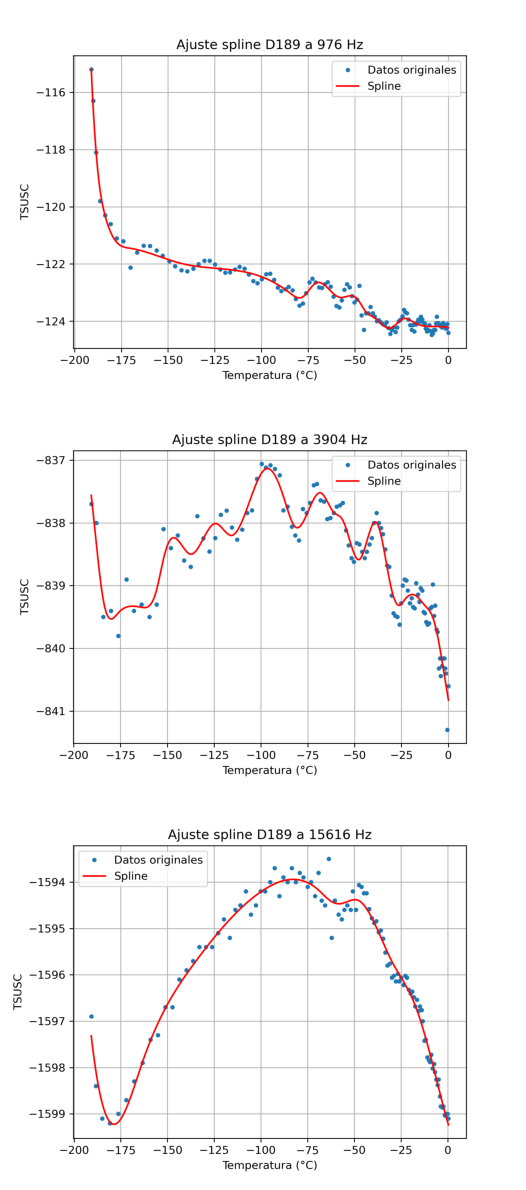

In [309]:
import matplotlib.image as mpimg

ruta_976 = 'C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D189/Spline2D_D189_976.png'
ruta_3904 = 'C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D189/Spline2D_D189_3904.png'
ruta_15616 = 'C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D189/Spline2D_D189_15616.png'

img1 = mpimg.imread(ruta_976)
img2 = mpimg.imread(ruta_3904)
img3 = mpimg.imread(ruta_15616)

fig, axs = plt.subplots(3, 1, figsize=(6, 12)) 

axs[0].imshow(img1)
axs[0].axis('off')

axs[1].imshow(img2)
axs[1].axis('off')

axs[2].imshow(img3)
axs[2].axis('off')

plt.tight_layout()
plt.savefig('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D189/ArregloSplines2D_D189_976.png', dpi=300)
plt.show()

## Muestra D185 a 15616 Hz

### Fourier

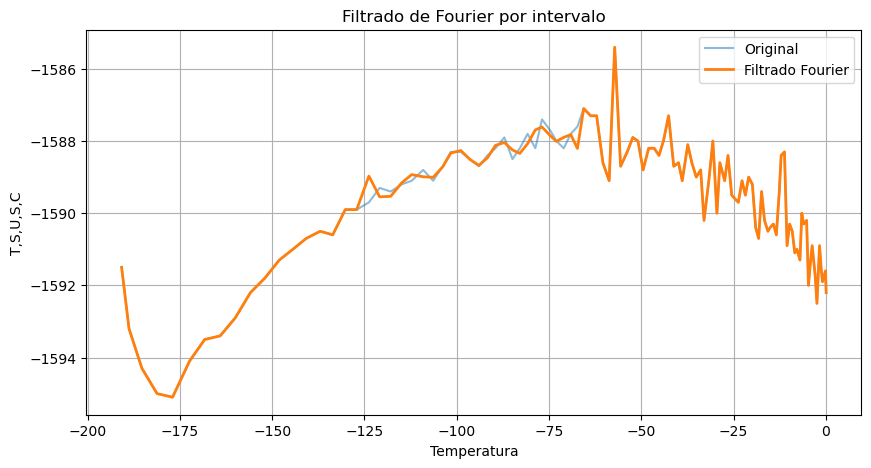

In [338]:
df = pd.read_excel('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D185/D185_15616.xlsx')  
x = df['Temperatura'].values
y = df['TSUSC'].values  

i_ini = 18 
i_fin = 42 

y_segment = y[i_ini:i_fin+1]
y_fft = np.fft.fft(y_segment)
frequencies = np.fft.fftfreq(len(y_segment))

cutoff = 0.2
y_fft_filtered = y_fft.copy()
y_fft_filtered[np.abs(frequencies) > cutoff] = 0

y_smoothed_segment = np.fft.ifft(y_fft_filtered).real
y_smoothed = y.copy()
y_smoothed[i_ini:i_fin+1] = y_smoothed_segment

df_filtrado = pd.DataFrame({
    'Temperatura': x,
    'TSUSC': y_smoothed
})

output_path = 'C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D185/fourier_D185_15616.xlsx' 
df_filtrado.to_excel(output_path, index=False)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Original', alpha=0.5)
plt.plot(x, y_smoothed, label='Filtrado Fourier', linewidth=2)
plt.xlabel('Temperatura')
plt.ylabel('T,S,U,S,C')
plt.title('Filtrado de Fourier por intervalo')
plt.legend()
plt.grid(True)
plt.show()

### Ventana movil

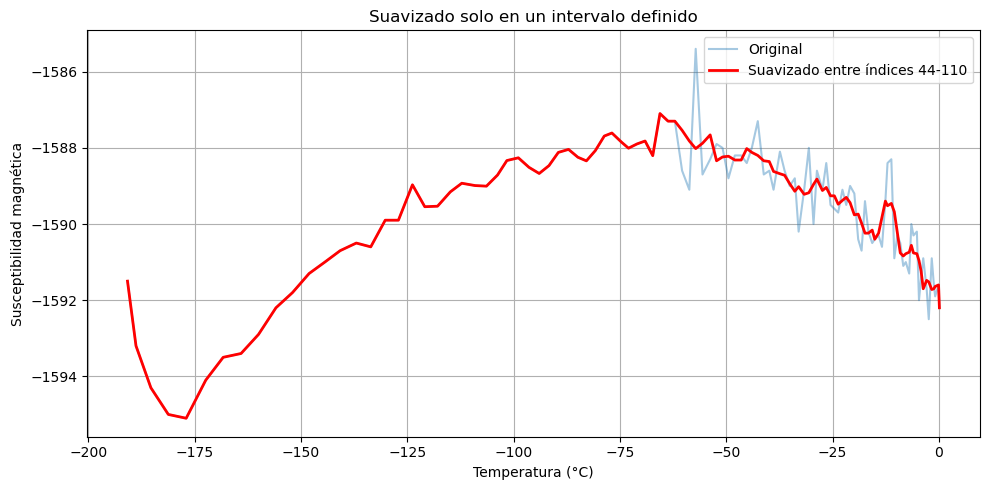

In [340]:
archivo = 'C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D185/fourier_D185_15616.xlsx'  
ventana = 5
inicio = 44
fin = 110

df = pd.read_excel(archivo)
df.columns = ['Temperatura', 'TSUSC']
df['Suavizado Parcial'] = df['TSUSC']

suavizado = df.loc[inicio:fin, 'TSUSC'].rolling(window=ventana, center=True).mean()
suavizado_final = suavizado.copy()
suavizado_final.fillna(df.loc[inicio:fin, 'TSUSC'], inplace=True)

df.loc[inicio:fin, 'Suavizado Parcial'] = suavizado_final

plt.figure(figsize=(10, 5))
plt.plot(df['Temperatura'], df['TSUSC'], label='Original', alpha=0.4)
plt.plot(df['Temperatura'], df['Suavizado Parcial'], label=f'Suavizado entre índices {inicio}-{fin}', color='red', linewidth=2)
plt.xlabel('Temperatura (°C)')
plt.ylabel('Susceptibilidad magnética')
plt.title('Suavizado solo en un intervalo definido')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

df.to_excel('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D185/suavizado_D185_15616.xlsx', index=False)

### Splines

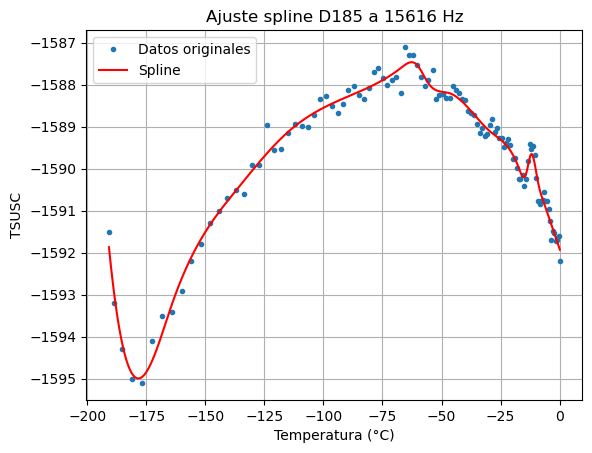

In [461]:
from scipy.interpolate import UnivariateSpline

df = pd.read_excel('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D185/suavizado_D185_15616.xlsx')
df = df.sort_values(by='Temperatura')

x = df['Temperatura']
y = df['Suavizado Parcial']
spline = UnivariateSpline(x, y, s=5)

x_new = np.linspace(x.min(), x.max(), 1000)
y_new = spline(x_new)

plt.plot(x, y, 'o', label='Datos originales', markersize=3)
plt.plot(x_new, y_new, 'r-', label='Spline')
plt.xlabel('Temperatura (°C)')
plt.ylabel('TSUSC')
plt.title('Ajuste spline D185 a 15616 Hz')
plt.legend()
plt.grid(True)
plt.savefig('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D185/Spline2D_D185_15616.png', dpi=300)
plt.show()

df_spline = pd.DataFrame({
    'Temperatura': x_new,
    'Spline': y_new
})

df_spline.to_excel('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D185/spline_final_D185_15616.xlsx', index=False)

## Muestra D185 a 3904 Hz
### Fourier

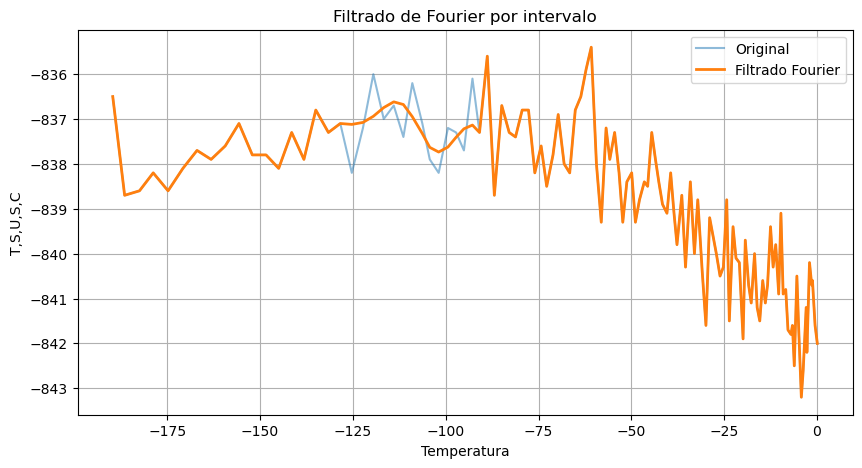

In [358]:
df = pd.read_excel('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D185/D185_3904.xlsx')  
x = df['Temperatura'].values
y = df['TSUSC'].values  

i_ini = 18 
i_fin = 31 

y_segment = y[i_ini:i_fin+1]
y_fft = np.fft.fft(y_segment)
frequencies = np.fft.fftfreq(len(y_segment))

cutoff = 0.2
y_fft_filtered = y_fft.copy()
y_fft_filtered[np.abs(frequencies) > cutoff] = 0

y_smoothed_segment = np.fft.ifft(y_fft_filtered).real
y_smoothed = y.copy()
y_smoothed[i_ini:i_fin+1] = y_smoothed_segment

df_filtrado = pd.DataFrame({
    'Temperatura': x,
    'TSUSC': y_smoothed
})

output_path = 'C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D185/fourier_D185_3904.xlsx' 
df_filtrado.to_excel(output_path, index=False)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Original', alpha=0.5)
plt.plot(x, y_smoothed, label='Filtrado Fourier', linewidth=2)
plt.xlabel('Temperatura')
plt.ylabel('T,S,U,S,C')
plt.title('Filtrado de Fourier por intervalo')
plt.legend()
plt.grid(True)
plt.show()

### Ventana movil

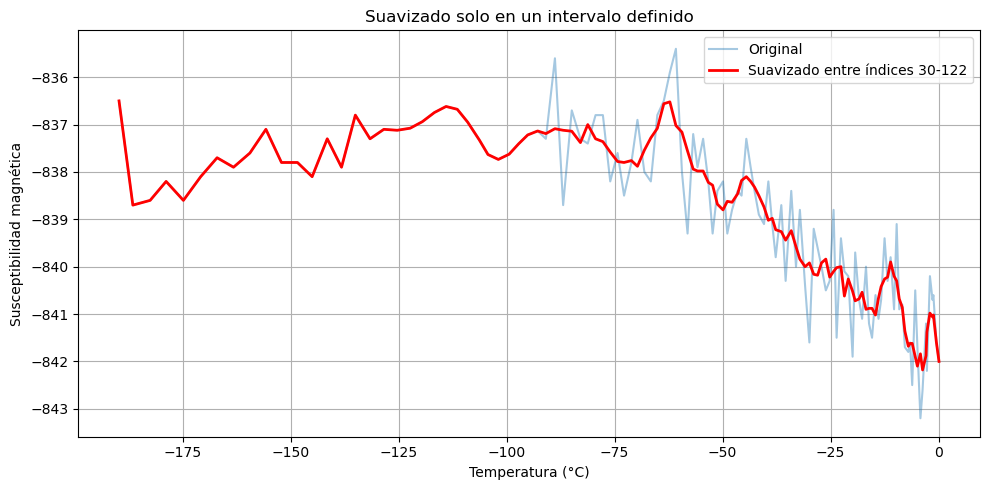

In [378]:
archivo = 'C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D185/fourier_D185_3904.xlsx'  
ventana = 5
inicio = 30
fin = 122

df = pd.read_excel(archivo)
df.columns = ['Temperatura', 'TSUSC']
df['Suavizado Parcial'] = df['TSUSC']

suavizado = df.loc[inicio:fin, 'TSUSC'].rolling(window=ventana, center=True).mean()
suavizado_final = suavizado.copy()
suavizado_final.fillna(df.loc[inicio:fin, 'TSUSC'], inplace=True)

df.loc[inicio:fin, 'Suavizado Parcial'] = suavizado_final

plt.figure(figsize=(10, 5))
plt.plot(df['Temperatura'], df['TSUSC'], label='Original', alpha=0.4)
plt.plot(df['Temperatura'], df['Suavizado Parcial'], label=f'Suavizado entre índices {inicio}-{fin}', color='red', linewidth=2)
plt.xlabel('Temperatura (°C)')
plt.ylabel('Susceptibilidad magnética')
plt.title('Suavizado solo en un intervalo definido')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

df.to_excel('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D185/suavizado_D185_3904.xlsx', index=False)

### Splines

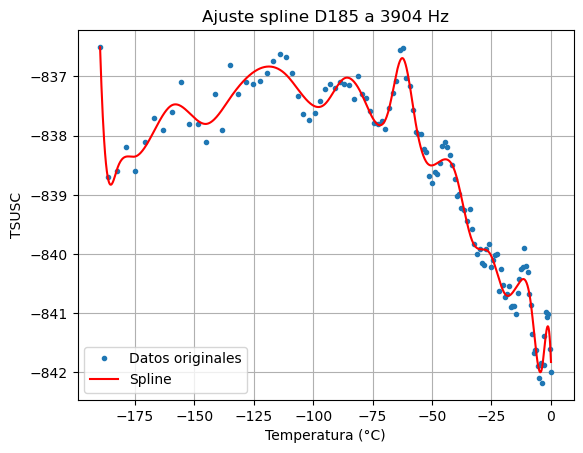

In [463]:
from scipy.interpolate import UnivariateSpline

df = pd.read_excel('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D185/suavizado_D185_3904.xlsx')
df = df.sort_values(by='Temperatura')

x = df['Temperatura']
y = df['Suavizado Parcial']
spline = UnivariateSpline(x, y, s=5)

x_new = np.linspace(x.min(), x.max(), 1000)
y_new = spline(x_new)

plt.plot(x, y, 'o', label='Datos originales', markersize=3)
plt.plot(x_new, y_new, 'r-', label='Spline')
plt.xlabel('Temperatura (°C)')
plt.ylabel('TSUSC')
plt.title('Ajuste spline D185 a 3904 Hz')
plt.legend()
plt.grid(True)
plt.savefig('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D185/Spline2D_D185_3904.png', dpi=300)
plt.show()

df_spline = pd.DataFrame({
    'Temperatura': x_new,
    'Spline': y_new
})

df_spline.to_excel('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D185/spline_final_D185_3904.xlsx', index=False)

## Muestra D185 a 976 Hz
### Fourier

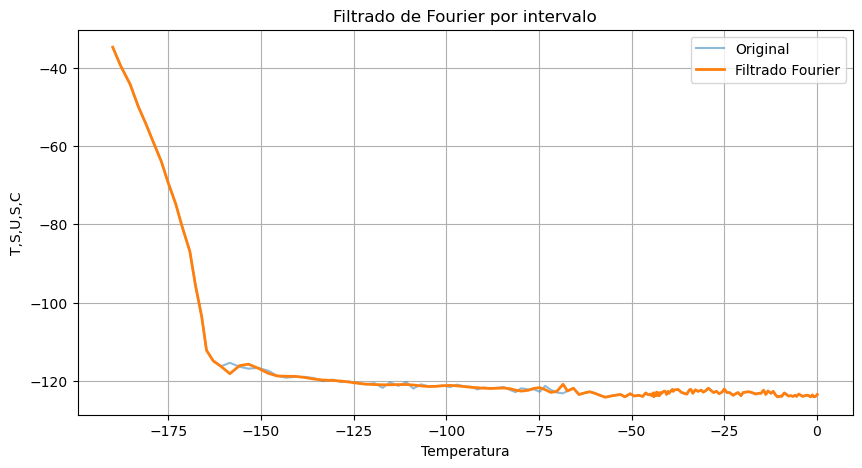

In [398]:
df = pd.read_excel('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D185/D185_976.xlsx')  
x = df['Temperatura'].values
y = df['TSUSC'].values  

i_ini = 16 
i_fin = 60 

y_segment = y[i_ini:i_fin+1]
y_fft = np.fft.fft(y_segment)
frequencies = np.fft.fftfreq(len(y_segment))

cutoff = 0.2
y_fft_filtered = y_fft.copy()
y_fft_filtered[np.abs(frequencies) > cutoff] = 0

y_smoothed_segment = np.fft.ifft(y_fft_filtered).real
y_smoothed = y.copy()
y_smoothed[i_ini:i_fin+1] = y_smoothed_segment

df_filtrado = pd.DataFrame({
    'Temperatura': x,
    'TSUSC': y_smoothed
})

output_path = 'C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D185/fourier_D185_976.xlsx' 
df_filtrado.to_excel(output_path, index=False)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Original', alpha=0.5)
plt.plot(x, y_smoothed, label='Filtrado Fourier', linewidth=2)
plt.xlabel('Temperatura')
plt.ylabel('T,S,U,S,C')
plt.title('Filtrado de Fourier por intervalo')
plt.legend()
plt.grid(True)
plt.show()

### Ventana movil

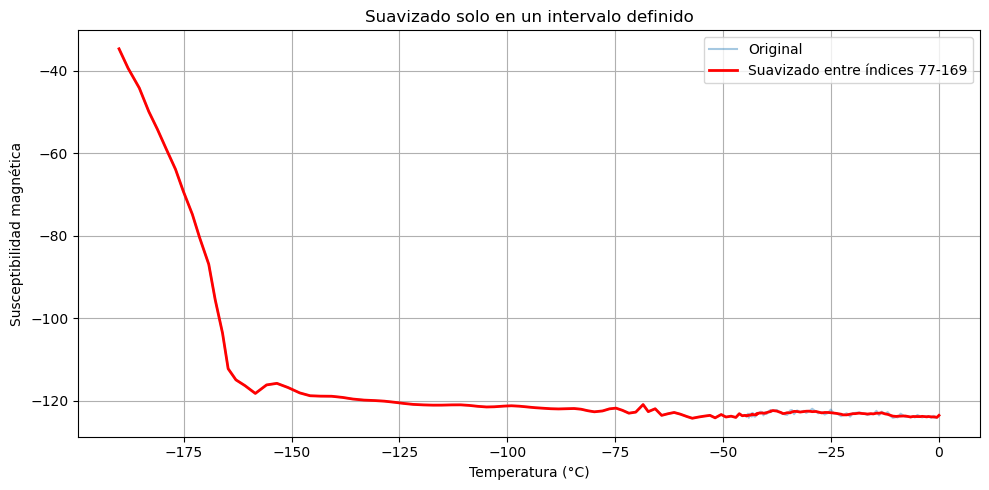

In [400]:
archivo = 'C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D185/fourier_D185_976.xlsx'  
ventana = 5
inicio = 77
fin = 169

df = pd.read_excel(archivo)
df.columns = ['Temperatura', 'TSUSC']
df['Suavizado Parcial'] = df['TSUSC']

suavizado = df.loc[inicio:fin, 'TSUSC'].rolling(window=ventana, center=True).mean()
suavizado_final = suavizado.copy()
suavizado_final.fillna(df.loc[inicio:fin, 'TSUSC'], inplace=True)

df.loc[inicio:fin, 'Suavizado Parcial'] = suavizado_final

plt.figure(figsize=(10, 5))
plt.plot(df['Temperatura'], df['TSUSC'], label='Original', alpha=0.4)
plt.plot(df['Temperatura'], df['Suavizado Parcial'], label=f'Suavizado entre índices {inicio}-{fin}', color='red', linewidth=2)
plt.xlabel('Temperatura (°C)')
plt.ylabel('Susceptibilidad magnética')
plt.title('Suavizado solo en un intervalo definido')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

df.to_excel('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D185/suavizado_D185_976.xlsx', index=False)

### Splines

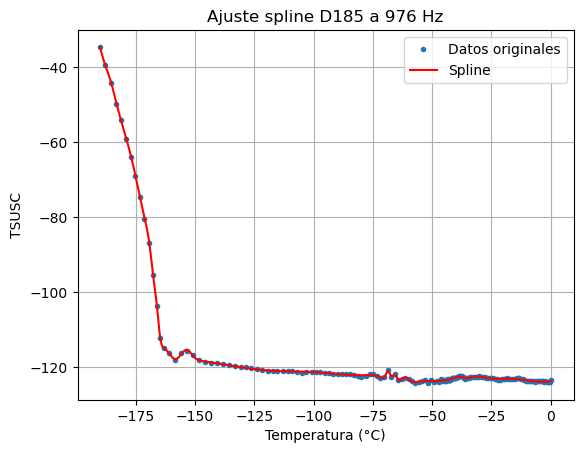

In [467]:
from scipy.interpolate import UnivariateSpline

df = pd.read_excel('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D185/suavizado_D185_976.xlsx')
df = df.sort_values(by='Temperatura')

x = df['Temperatura']
y = df['Suavizado Parcial']
spline = UnivariateSpline(x, y, s=5)

x_new = np.linspace(x.min(), x.max(), 1000)
y_new = spline(x_new)

plt.plot(x, y, 'o', label='Datos originales', markersize=3)
plt.plot(x_new, y_new, 'r-', label='Spline')
plt.xlabel('Temperatura (°C)')
plt.ylabel('TSUSC')
plt.title('Ajuste spline D185 a 976 Hz')
plt.legend()
plt.grid(True)
plt.savefig('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D185/Spline2D_D185_976.png', dpi=300)
plt.show()

df_spline = pd.DataFrame({
    'Temperatura': x_new,
    'Spline': y_new
})

df_spline.to_excel('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D185/spline_final_D185_976.xlsx', index=False)

## Curvas en 3D

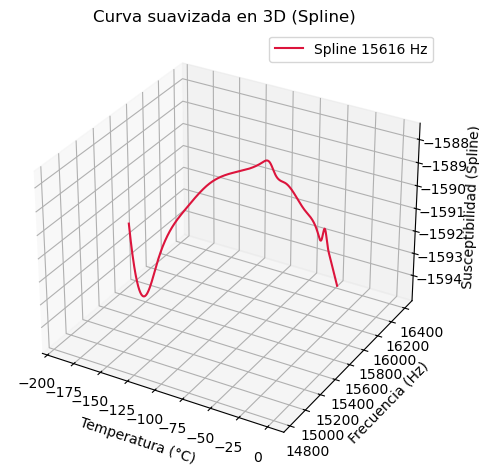

In [413]:
from mpl_toolkits.mplot3d import Axes3D

archivo = "C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D185/spline_final_D185_15616.xlsx"  
df = pd.read_excel(archivo)

x = df["Temperatura"].to_numpy()
z = df["Spline"].to_numpy()
f = 15616  # frecuencia fija
y = np.full_like(x, f)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label="Spline 15616 Hz", color='crimson')

ax.set_xlabel("Temperatura (°C)")
ax.set_ylabel("Frecuencia (Hz)")
ax.set_zlabel("Susceptibilidad (Spline)")
ax.set_title("Curva suavizada en 3D (Spline)")
plt.legend()
plt.tight_layout()
plt.savefig('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D185/Spline3D_D185_15616.png', dpi=300)
plt.show()

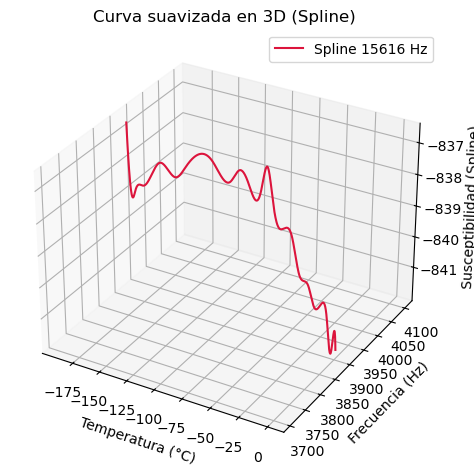

In [421]:
from mpl_toolkits.mplot3d import Axes3D

archivo = "C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D185/spline_final_D185_3904.xlsx"  
df = pd.read_excel(archivo)

x = df["Temperatura"].to_numpy()
z = df["Spline"].to_numpy()
f = 3904  # frecuencia fija
y = np.full_like(x, f)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label="Spline 15616 Hz", color='crimson')

ax.set_xlabel("Temperatura (°C)")
ax.set_ylabel("Frecuencia (Hz)")
ax.set_zlabel("Susceptibilidad (Spline)")
ax.set_title("Curva suavizada en 3D (Spline)")
plt.legend()
plt.tight_layout()
plt.savefig('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D185/Spline3D_D185_3904.png', dpi=300)
plt.show()

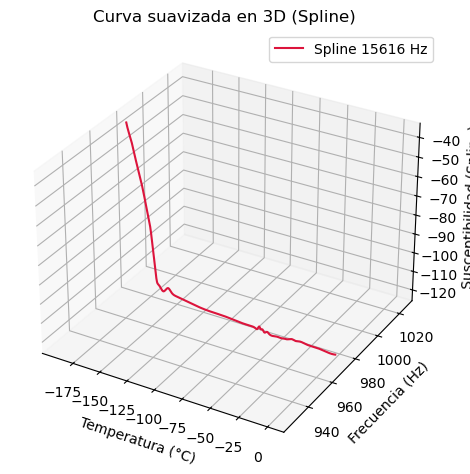

In [427]:
from mpl_toolkits.mplot3d import Axes3D

archivo = "C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D185/spline_final_D185_976.xlsx"  
df = pd.read_excel(archivo)

x = df["Temperatura"].to_numpy()
z = df["Spline"].to_numpy()
f = 976  # frecuencia fija
y = np.full_like(x, f)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label="Spline 15616 Hz", color='crimson')

ax.set_xlabel("Temperatura (°C)")
ax.set_ylabel("Frecuencia (Hz)")
ax.set_zlabel("Susceptibilidad (Spline)")
ax.set_title("Curva suavizada en 3D (Spline)")
plt.legend()
plt.tight_layout()
plt.savefig('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D185/Spline3D_D185_976.png', dpi=300)
plt.show()

## Superficie D185

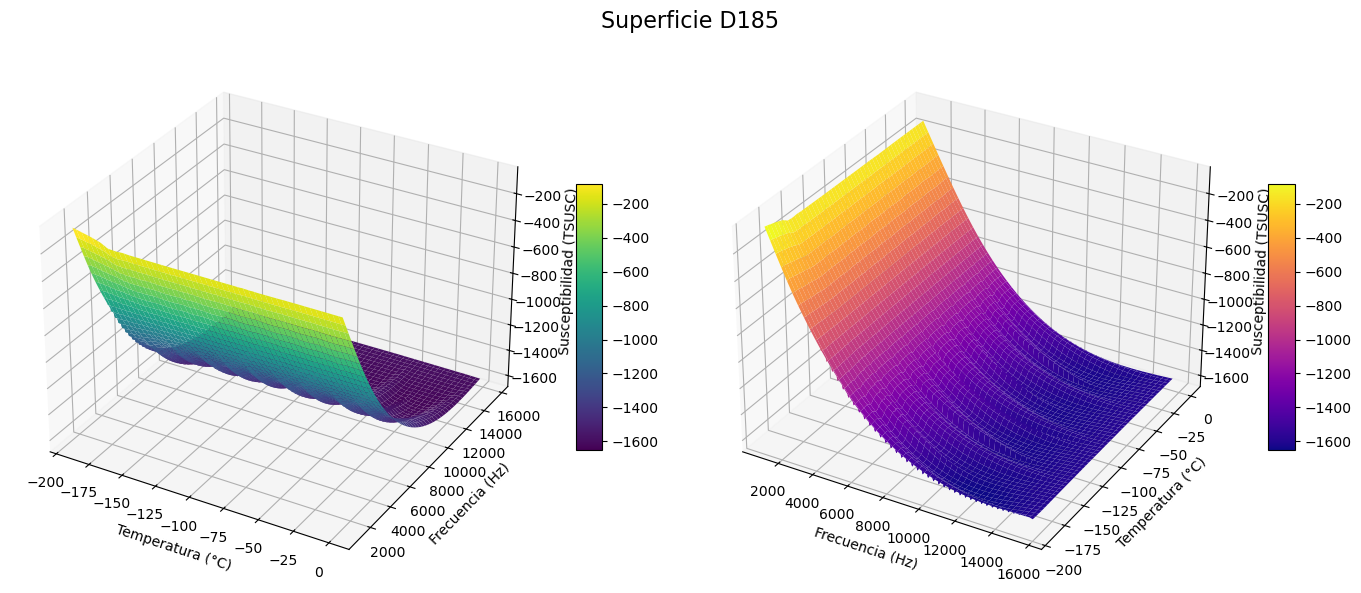

In [431]:
from scipy.interpolate import griddata

archivos = {
    976: 'C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D185/spline_final_D185_976.xlsx',
    3904: 'C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D185/spline_final_D185_3904.xlsx',
    15616: 'C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D185/spline_final_D185_15616.xlsx'
}

datos = []
for f, archivo in archivos.items():
    df = pd.read_excel(archivo)
    df['frecuencia'] = f  
    datos.append(df)

df_total = pd.concat(datos)

temperatura = df_total['Temperatura']
frecuencia = df_total['frecuencia']
splines = df_total['Spline']

ti = np.linspace(temperatura.min(), temperatura.max(), 200)
fi = np.linspace(frecuencia.min(), frecuencia.max(), 200)

# Vista 1: X=temperatura, Y=frecuencia
X1, Y1 = np.meshgrid(ti, fi)
Z1 = griddata((temperatura, frecuencia), splines, (X1, Y1), method='cubic')

# Vista 2: X=frecuencia, Y=temperatura
X2, Y2 = np.meshgrid(fi, ti)
Z2 = griddata((frecuencia, temperatura), splines, (X2, Y2), method='cubic')

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf1 = ax1.plot_surface(X1, Y1, Z1, cmap='viridis')
ax1.set_xlabel("Temperatura (°C)")
ax1.set_ylabel("Frecuencia (Hz)")
ax1.set_zlabel("Susceptibilidad (TSUSC)")
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=10)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
surf2 = ax2.plot_surface(X2, Y2, Z2, cmap='plasma')
ax2.set_xlabel("Frecuencia (Hz)")
ax2.set_ylabel("Temperatura (°C)")
ax2.set_zlabel("Susceptibilidad (TSUSC)")
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=10)

fig.suptitle('Superficie D185', fontsize=16)
plt.tight_layout()
plt.savefig('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D185/Superficie_D185.png', dpi=300)
plt.show()

## Imagen extra para el reporte de laboratorio

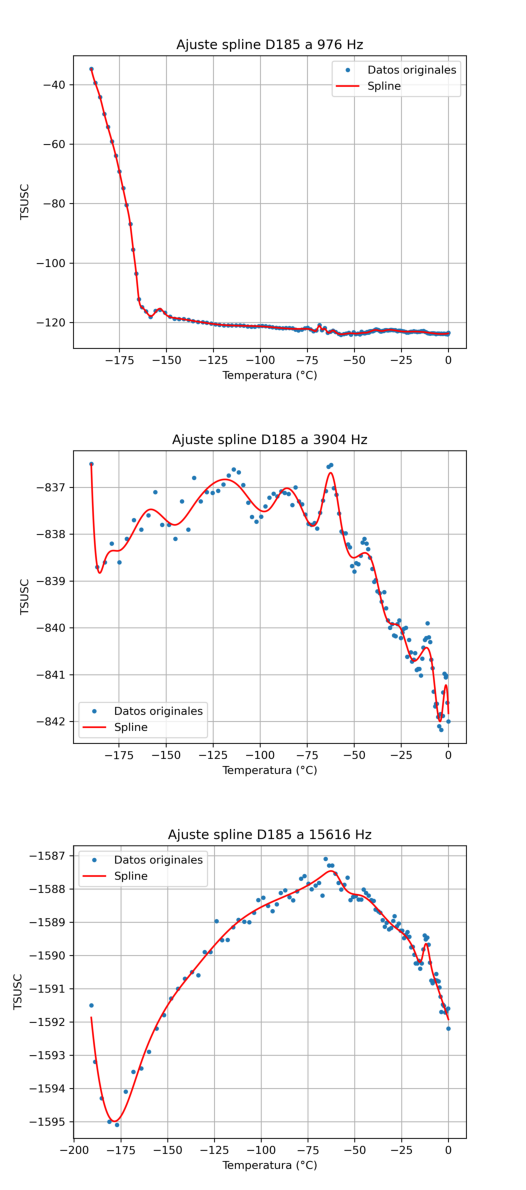

In [469]:
import matplotlib.image as mpimg

ruta_976 = 'C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D185/Spline2D_D185_976.png'
ruta_3904 = 'C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D185/Spline2D_D185_3904.png'
ruta_15616 = 'C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D185/Spline2D_D185_15616.png'

img1 = mpimg.imread(ruta_976)
img2 = mpimg.imread(ruta_3904)
img3 = mpimg.imread(ruta_15616)

fig, axs = plt.subplots(3, 1, figsize=(6, 12)) 

axs[0].imshow(img1)
axs[0].axis('off')

axs[1].imshow(img2)
axs[1].axis('off')

axs[2].imshow(img3)
axs[2].axis('off')

plt.tight_layout()
plt.savefig('C:/Users/jesus/OneDrive/Escritorio/Chucho/9no semestre/Contempo II/Susceptibilidad/D185/ArregloSplines2D_D185_976.png', dpi=300)
plt.show()